# **Which Neighborhood is the Best to Raise a Child in? 👶**
### By Michelle Hong and Rachel Soubier
----

### **Introduction**
In every neighborhood in Pittsburgh there will most likely be a family expecting to raise a child, but how do they know if they are living in the *best* neighborhood Pittsburgh can offer? In order to determine this, we had looked for data sets to help define our metric and provide an answer to this question.

## **Our Metric: Child Happiness and Safety**
We decided to measure a child's happiness and safety using three metrics:
1. Neighborhood with the most amount of playgrounds
2. Neighborhood with the most amount of traffic signs/fixtures
3. Neighborhood with the least amount of hideable trees

These were links to our data sets (respectively):
1. https://data.wprdc.org/dataset/playgrounds
2. https://data.wprdc.org/dataset/city-traffic-signs
3. https://data.wprdc.org/dataset/allegheny-county-wooded-area-boundaries

----

# __Metric: Number of Playgrounds__ 🛝

### _By: Rachel Soubier_

## Introduction

We are using pandas and data visualization to determine which Pittsburgh neighborhood is best to raise a child in. This notebook examines a data set that shows how many playgrounds are in each neighborhood. Less people per playground (and therefore a higher ratio of playgrounds to people) determines a better neighborhood to raise a child.

## Import Pandas & Data

I started by importing pandas, numPy, and matplot, as well as reading in our data csv files. I used a data set containing the number of playgrounds per neighborhood, as well as the population per neighborhood (more on that later).

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

playground_data = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367")
pop_data = pd.read_csv("https://data.wprdc.org/dataset/95af9f2c-61c8-446b-ae72-852e195684f3/resource/a8414ed5-c50f-417e-bb67-82b734660da6/download/preliminarycitypittsburghneighborhood_pl94171summary-2.csv")

## Counting Parks

For starting reference, here is a table which shows the top 5 neighboorhoods with the most playgrounds. As you can see, this isn't super helpful because there isn't a very wide range of values.

In [2]:
counts = playground_data['neighborhood'].value_counts().rename_axis('Neighborhood').reset_index(name = 'num_playgrounds')
counts.head(5)

,Neighborhood,num_playgrounds
0,Squirrel Hill South,8
1,Beechview,5
2,South Side Slopes,5
3,Highland Park,4
4,Sheraden,4


Since we don't get that much information from just the playgrounds data set, I chose to import a data set containing the population of each neighborhood. This way, I could figure out the ratio of people to playgrounds in each neighborhood, which is probably a more useful metric. 

## Renaming data to match

The population data set used "Spring Hill-City", while the playground set used "Spring Hill-City View". I adjusted the population data set so they both matched and the data could be read from both.

In [3]:
pop_data.loc[pop_data['Neighborhood']=='Spring Hill-City', 'Neighborhood'] = 'Spring Hill-City View'

## Finding ratio of playgrounds to people, per neighborhood

Using the new population data set, I calculated the number of people per playground in each neighborhood. Then, I sorted them to show which neighborhood had the least amount of people per playground. Less people per playground is better, in this case, as there will be more opportunities for kids to play.

In [4]:
merged = pd.merge(counts, pop_data, how='left', on='Neighborhood')
merged['People Per Playground'] = merged['2020_Total_Population']/merged['num_playgrounds']
sorted_data = merged[['Neighborhood', 'People Per Playground']].sort_values('People Per Playground')
sorted_data

,Neighborhood,People Per Playground
36,West End,205.00
57,Hays,321.00
63,Esplen,322.00
6,Allegheny Center,354.75
5,Beltzhoover,401.00
...,...,...
52,Central Oakland,5835.00
31,Bluff,5882.00
27,Brookline,6531.50
39,Squirrel Hill North,11879.00


The table shows the five playgrounds with the smallest and largest ratios of people per playground. 

## Visualizing the Data

Finally, I displayed the data on playground populations using a bar chart with matplot.

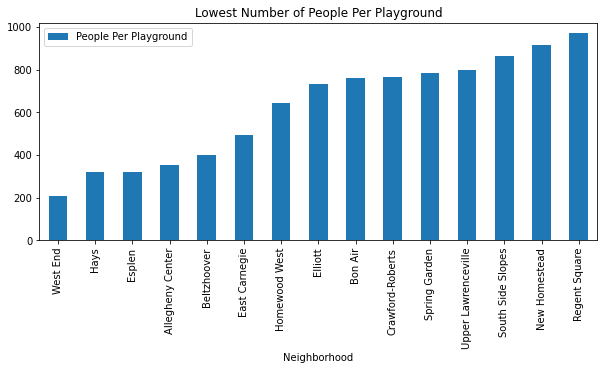

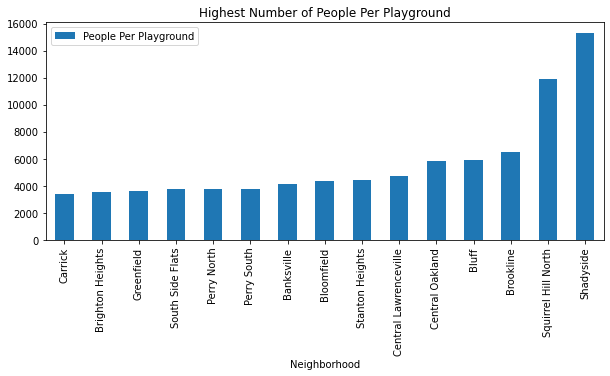

In [5]:
least_ppl = sorted_data.head(15)
least_ppl.plot.bar(x='Neighborhood', y='People Per Playground', title='Lowest Number of People Per Playground', figsize=(10, 4))

most_ppl = sorted_data.tail(15)
most_ppl.plot.bar(x='Neighborhood', y='People Per Playground', title='Highest Number of People Per Playground', figsize=(10, 4))

## Conclusion

Based solely on the playground metric, the best Pittsburgh neighborhood for raising a child is West End. There is an average of 205 people per playground there. While this may seem like a lot, this accounts for people of all ages, not just children. Unfortunately, there was no data readily available for the number of children in each neighborhood, but according to the census bureau 18.8% of Allegheny County is under the age of 18. 18.8% of 205 would make an average of 39 children per playground in West End. By comparison, Shadyside has an average of 2,880 children per playground. Not great.

----

# **Metric: Number of Traffic Signs 🚸**
### By Michelle Hong


We analysized the number of traffic signs in each neighborhood in order to determine which neighborhood enforces more caution for drivers.

*The more amount of traffic signs, the more safe the neighborhood would be for children to be out in*

## Importing Pandas, Matplotlin, and Geopandas & the Data

Found the neighborhood identifier called 'neighborhood'

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [7]:
# importing the data:
trafficSigns = pd.read_csv("https://data.wprdc.org/datastore/dump/d078a6b5-83a3-4723-a3a9-5371cfe1cc0c")
trafficSigns.head()

,id,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1673225887,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,668379452,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,174468442,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,1517107112,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,1374142598,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671


In [8]:
print(len(trafficSigns['neighborhood'].unique()))
trafficSigns['neighborhood'].unique()

92


array(['California-Kirkbride', 'Overbrook', 'Squirrel Hill North',
       'Highland Park', 'North Shore', 'East Allegheny',
       'Central Northside', 'Bluff', 'Point Breeze', 'Central Oakland',
       'North Oakland', 'South Oakland', 'Shadyside', 'West Oakland',
       'Central Business District', 'Terrace Village', 'Mount Washington',
       'Upper Hill', 'Polish Hill', 'Middle Hill', 'East Hills',
       'Squirrel Hill South', 'East Liberty', 'Brighton Heights',
       'Knoxville', 'Lincoln-Lemington-Belmar', 'Homewood South',
       'Greenfield', 'Bloomfield', 'Homewood North', 'Carrick',
       'Strip District', 'Regent Square', 'Crawford-Roberts',
       'South Side Slopes', 'South Side Flats', nan, 'Allegheny Center',
       'Lower Lawrenceville', 'Beechview', 'Spring Hill-City View',
       'Marshall-Shadeland', 'Elliott', 'West End', 'Allegheny West',
       'Lincoln Place', 'Chateau', 'Swisshelm Park', 'Brookline',
       'Westwood', 'Perry North', 'Point Breeze North', 'La

## Creating a New Dataset

Using panda's "group-by" function we were able to make a new dataset that matched each neighborhood to the total times a mounting fixture showed up.
Then we sorted the dataset by the values to find the neighborhood with the highest number of traffic sign occurances and the lowest amount of traffic sign occurances

In [9]:
signsPerNeighborhood = trafficSigns.groupby('neighborhood')['mounting_fixture'].count()
signsPerNeighborhood.sort_values(ascending = False)
sortedFixtures = pd.DataFrame(signsPerNeighborhood.sort_values(ascending = False))
sortedFixtures

,mounting_fixture
neighborhood,
South Side Flats,3672
Bloomfield,3627
Central Business District,3491
Shadyside,3370
Squirrel Hill South,3281
...,...
Ridgemont,62
Chartiers City,44
Glen Hazel,38


## Using Geopandas
We then loaded the neighborhoods map object and merged our data from the map and our dataset to make a map that puts together the number of mounting fixtures with the neighborhood

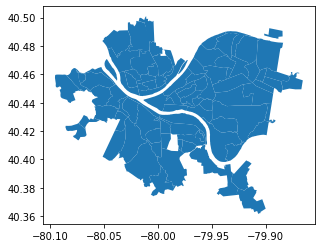

In [10]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

In [11]:
mapMF = neighborhoods.merge(signsPerNeighborhood, how='left', left_on='hood', right_on='neighborhood')
mapMF [['hood', 'mounting_fixture','geometry']].head()

,hood,mounting_fixture,geometry
0,Central Oakland,1327,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,1743,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,486,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,784,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,1366,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


## Making the Map

To make the map, we used the mapping feature on geopandas to make a choropleth map that made the areas with more mounting fixtures bright

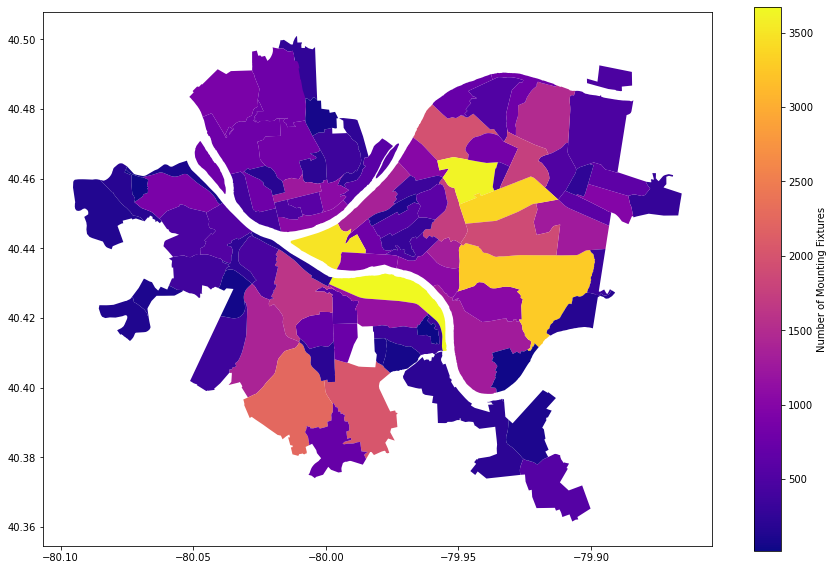

In [12]:
mapMF.plot(column='mounting_fixture', 
           cmap='plasma', 
           legend=True, 
            legend_kwds={'label': "Number of Mounting Fixtures"},
          figsize=(15, 10)) 

## Conclusion

Based on the visualized data, the most likely neighborhood where drivers would be most cautious in would be Southside Flats and Bloomfield. However, because there is data in every single neighborhood on mounting fixtures, it is hard to determine where children will be at risk from reckless drivers. But, based on the map we can assume that neighborhoods such as Glen Hazel, Arlington Heights, and Mount Oliver Bourough would make children the most at risk on the streets.

---

# **Metric: Number of Hideable Trees 🌳**
### By Michelle Hong

We analyzed the number and the size of trees in order to find the neighborhood that may allow for the most kidnappers to hide in

*The more amount of hideable trees, the more possible kidnappers in a certain neighborhood*

## Importing Pandas and Matplotlib & the Data:

Because there is so much data for Jupyter to read in, we set the low_memory equal to 'False' so that Jupyter can read in the data but columns instead of reading it in by rows.

In [13]:
import pandas as pd
%matplotlib inline

In [14]:
# importing the data:
trees = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da", low_memory = False)
trees

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45704,39047675,499 N LANG AVE,N LANG AVE,Maple: Norway,Acer platanoides,15.0,15.0,NaN,NaN,NaN,...,Point Breeze North,9.0,14.0,4.200314e+10,2.0,14.0,4.0,3-14,40.453499,-79.901280
45705,1827907131,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,NaN,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.443065,-79.934139
45706,1513723611,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,NaN,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.443010,-79.934095
45707,1830872418,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,NaN,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.442946,-79.934062


## Minimizing the Amount of Data to Analyze

In order to only consider the trees that kidnappers would actually consider hiding behind, we narrows down the trees by their width and only take in and display the ones that have trunks with a width of at least 20 inches.

*The average width of shoulders is ~15 inches so I rounded up to 20 inches*

In [15]:
widerTrees = trees.loc[trees['width'] > 19]
widerTrees

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
10,998993932,3233,THAYER ST,Honeylocust: Thornless,Gleditsia triacanthos inermis,48.0,20.0,99.0,99.0,Open or Restricted,...,Sheraden,2.0,20.0,4.200320e+10,5.0,20.0,6.0,1-16,40.453213,-80.067245
11,1870646392,1427,ISOLINE ST,Oak: Northern Red,Quercus rubra,65.0,20.0,99.0,99.0,Open or Unrestricted,...,Chartiers City,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-16,40.455997,-80.070408
17,1785336569,3165,ASHLYN ST,Linden: Littleleaf,Tilia cordata,36.0,30.0,12.0,3.0,Well or Pit,...,Sheraden,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-16,40.457545,-80.057536
30,898122731,3234,MOTOR ST,Locust: Black,Robinia pseudoacacia,60.0,35.0,99.0,99.0,Open or Unrestricted,...,Sheraden,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-16,40.459050,-80.056144
31,1582917146,3234,MOTOR ST,Cherry: Black,Prunus serotina,60.0,35.0,99.0,99.0,Open or Unrestricted,...,Sheraden,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-16,40.458991,-80.056229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45261,1946247732,1129,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,25.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476230,-79.924299
45318,1386613706,3971,BRIGHTON RD,Oak: Northern Red,Quercus rubra,65.0,40.0,NaN,NaN,NaN,...,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,40.487504,-80.040586
45319,700063579,3971,NaN,Oak: Northern Red,Quercus rubra,60.0,25.0,NaN,NaN,NaN,...,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,40.487471,-80.040499
45322,49984623,18 sprain st,NaN,Mulberry: Red,Morus rubra,40.0,30.0,NaN,NaN,NaN,...,Fineview,1.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.463636,-80.001481


**(data went from 45,709 rows to 2,273 rows)**

## Connecting the Trees to their Neighborhoods

Because the number of rows went from 45,709 rows to 2,273 rows we can now connect the trees to their respective neighborhoods

In [16]:
bestTrees = widerTrees['neighborhood']
bestTrees

10               Sheraden
11         Chartiers City
17               Sheraden
30               Sheraden
31               Sheraden
               ...       
45261       Highland Park
45318    Brighton Heights
45319    Brighton Heights
45322            Fineview
45339            Fineview
Name: neighborhood, Length: 2273, dtype: object

## Creating a Dictionary

Next we made a counter system that would count how many trees kidnappers would actually consider hiding behind, and added them all to a dictionary.

In [17]:
countTrees = dict()
for neighborhood in bestTrees[1:]:
    if neighborhood not in countTrees:
        countTrees[neighborhood] = 1
    else:
        countTrees[neighborhood] += 1
    
countTrees

{'Chartiers City': 2,
 'Sheraden': 26,
 'Stanton Heights': 46,
 'Highland Park': 77,
 'Polish Hill': 14,
 'Friendship': 34,
 'Garfield': 39,
 'East Liberty': 30,
 'Homewood South': 4,
 'Homewood North': 13,
 'East Hills': 47,
 'Squirrel Hill South': 220,
 'Marshall-Shadeland': 44,
 'Brighton Heights': 54,
 'Overbrook': 15,
 'South Side Slopes': 4,
 'Arlington': 3,
 'Carrick': 57,
 'Shadyside': 83,
 'North Shore': 3,
 'Greenfield': 20,
 'Point Breeze North': 16,
 'Point Breeze': 101,
 'Knoxville': 35,
 'Mount Washington': 40,
 'New Homestead': 12,
 'South Oakland': 3,
 'Beechview': 45,
 'Squirrel Hill North': 367,
 'Allegheny West': 13,
 'Hazelwood': 21,
 'Perry South': 53,
 'Central Northside': 7,
 'Middle Hill': 10,
 'Upper Hill': 21,
 'North Oakland': 49,
 'Bloomfield': 41,
 'Bon Air': 3,
 'Fineview': 21,
 'Lincoln-Lemington-Belmar': 48,
 'Regent Square': 21,
 'Central Oakland': 10,
 'Lower Lawrenceville': 62,
 'Westwood': 25,
 'Crafton Heights': 39,
 'Brookline': 56,
 'Lincoln Place

## Turning the Dictionary into a Dataset

We then turned the Dictionary into a readable dataset

In [18]:
treesDataset = pd.DataFrame([countTrees])
treesDataset

,Chartiers City,Sheraden,Stanton Heights,Highland Park,Polish Hill,Friendship,Garfield,East Liberty,Homewood South,Homewood North,...,Arlington Heights,St. Clair,Duquesne Heights,Allentown,Morningside,Allegheny Center,Manchester,Ridgemont,Beltzhoover,South Side Flats
0,2,26,46,77,14,34,39,30,4,13,...,1,2,2,1,11,1,1,1,1,1


In [19]:
treesFinal = treesDataset.transpose()
treesFinal = treesFinal.rename(columns={0: 'Hidable Trees'})

sortedTrees = treesFinal.sort_values('Hidable Trees', ascending=False)
sortedTrees

,Hidable Trees
Squirrel Hill North,367
Squirrel Hill South,220
Point Breeze,101
Central Business District,89
Shadyside,83
...,...
Allegheny Center,1
Manchester,1
Ridgemont,1
Beltzhoover,1


## Data Visualization

We took the data and plotted it on a bar chart to show the neighborhood with the highest rate in hidable trees to determine the most dangerous neighborhood for children to linger in

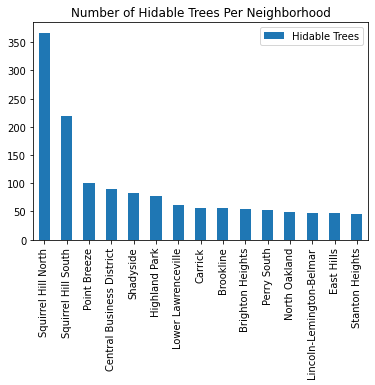

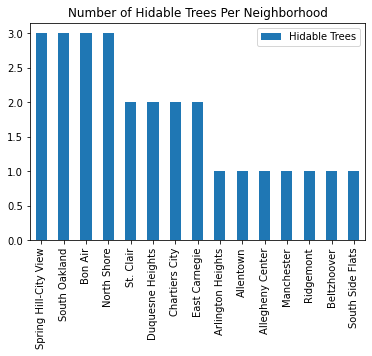

In [20]:
treeVisualMost = sortedTrees.head(15)
treeVisualMost.plot.bar(title='Number of Hidable Trees Per Neighborhood' )

treeVisualLeast = sortedTrees.tail(15)
treeVisualLeast.plot.bar(title='Number of Hidable Trees Per Neighborhood')

## Conclusion
Based on the visualized data, the most likely neighborhood children will be kidnapped in would be Squirrel Hill North with kidnappers having over 350 trees to choose from to hide behind. However, South Side Flats, Beltzhoover, Ridgemont, Manchester, Allegheny Center, Allentown, and Arlington Heights are the least likely neighborhoods that children might be kidnapped in as they only have one possible tree they could use to hide behind.

---

# **The Final Conclusion 🛝🚸🌳**
In order to actually determine which neighborhood is the **best** based on our metric and data we needed to compile all of the data onto one dataset and go from there. The hard thing was that the tree metric and playground metric had it so that the lower the number of hideable trees and people there were the better. Yet, for the traffic fixture metric, the more fixtures the better. 


## Adding a Rank Feature

Below we displayed all of our original data sets, but added a rank feature. The neighborhood with the best rank in each metric was assigned a value of 1, and so on:

In [21]:
# people per playground in each neighborhood
sorted_data['Playground Rank'] = sorted_data['People Per Playground'].rank()
sorted_data

,Neighborhood,People Per Playground,Playground Rank
36,West End,205.00,1.0
57,Hays,321.00,2.0
63,Esplen,322.00,3.0
6,Allegheny Center,354.75,4.0
5,Beltzhoover,401.00,5.0
...,...,...,...
52,Central Oakland,5835.00,64.0
31,Bluff,5882.00,65.0
27,Brookline,6531.50,66.0
39,Squirrel Hill North,11879.00,67.0


In [31]:
# fixtures in each neighborhood
sortedFixtures = sortedFixtures.rename_axis('Neighborhood')
sortedFixtures['Fixtures Rank'] = sortedFixtures['mounting_fixture'].rank(ascending=False)
sortedFixtures

,mounting_fixture,Fixtures Rank
Neighborhood,,
South Side Flats,3672,1.0
Bloomfield,3627,2.0
Central Business District,3491,3.0
Shadyside,3370,4.0
Squirrel Hill South,3281,5.0
...,...,...
Ridgemont,62,87.0
Chartiers City,44,88.0
Glen Hazel,38,89.0


In [27]:
# hideable tress in each neighborhood
sortedTrees = treesFinal.sort_values('Hidable Trees', ascending = True)
sortedTrees['Hidable Trees Rank'] = sortedTrees['Hidable Trees'].rank(method='dense')
sortedTrees

,Hidable Trees,Hidable Trees Rank
South Side Flats,1,1.0
Ridgemont,1,1.0
Manchester,1,1.0
Allegheny Center,1,1.0
Allentown,1,1.0
...,...,...
Shadyside,83,39.0
Central Business District,89,40.0
Point Breeze,101,41.0
Squirrel Hill South,220,42.0


For neighborhoods with NaN data, we decided to pretend it had some. For playgrounds, we assumed no data meant no playgrounds, so we gave them the lowest rank possible (92). For trees, we assumed no data meant no hidable trees (a good thing), so we gave it the highest rank of 1.

## Final Dataset

In [44]:
final_metric = pd.merge(sortedFixtures, sorted_data, how='left', on='Neighborhood').fillna({'Playground Rank':92})
final_metric = pd.merge(final_metric, sortedTrees, how='left', left_on='Neighborhood', right_index=True).fillna({'Hidable Trees Rank':1})
final_metric['Total Rank'] = final_metric['Fixtures Rank'] + final_metric['Playground Rank'] + final_metric['Hidable Trees Rank']
final_metric = final_metric[['Neighborhood', 'Fixtures Rank', 'Playground Rank', 'Hidable Trees Rank', 'Total Rank']]
final_metric.sort_values('Total Rank')

,Neighborhood,Fixtures Rank,Playground Rank,Hidable Trees Rank,Total Rank
19,South Side Slopes,20.0,13.0,4.0,37.0
22,South Oakland,23.0,19.0,3.0,45.0
39,Beltzhoover,40.0,5.0,1.0,46.0
44,Allegheny Center,45.0,4.0,1.0,50.0
32,Manchester,33.0,16.0,1.0,50.0
...,...,...,...,...,...
87,Chartiers City,88.0,92.0,2.0,182.0
88,Glen Hazel,89.0,92.0,1.0,182.0
89,Arlington Heights,90.0,92.0,1.0,183.0
90,Mount Oliver Borough,91.0,92.0,1.0,184.0


# Our Final Conclusion
---
Based on all of the metrics and data we analyzed, the *best neighborhood* to raise a child in is **South Side Slopes**  with a total rank of 37.0, and the *'worst' neighborhood* to raise a child in is **East Hills** with a total rank of 188.0 (boooo). 